In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

-The blow model takes into account only the columns that I deemed important when considering change on price. 
-This will serve as a second baseline model for comparison. 

In [25]:
df_house = pd.read_csv('kc_house_data.csv')

In [26]:
neededCols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'sqft_living15', 'sqft_lot15']

In [27]:
regression_data = df_house[neededCols]
regression_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [28]:
X = regression_data.drop(['price'], axis=1)
y = regression_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



lm = sm.OLS(y_train, X_train)

model_regression = lm.fit()
model_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              9177.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                        0.00
Time:                        14:07:05   Log-Likelihood:                     -2.3746e+05
No. Observations:               17290   AIC:                                  4.750e+05
Df Residuals:                   17276   BIC:                                  4.751e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.968e+04   2326.284    -12.760      0.000   -3.42e+04   -2.51e+04
bathrooms     -7995.0735   3791.798     -2.109      0.035   -1.54e+04    -562.766
sqft_living     122.6055      2.821     43.458      0.000     117.076     128.135
sqft_lot         -0.0039      0.065     -0.060      0.952      -0.131       0.123
floors         4450.1758   4317.126      1.031      0.303   -4011.828    1.29e+04
waterfront     5.517e+05   2.19e+04     25.144      0.000    5.09e+05    5.95e+05
view           5.495e+04   2608.649     21.064      0.000    4.98e+04    6.01e+04
condition      5.825e+04   2686.665     21.680      0.000     5.3e+04    6.35e+04
grade          1.107e+05   2587.049     42.806      0.000    1.06e+05    1.16e+05
sqft_above       46.7345      2.718     17.196      0.000      41.408      52.062
sqft_basement    75.8710      3.201     23.701      0.000      69.596      82.146
yr_built       -409.1591      9.695    -42.203      0.000    -428.162    -390.156
yr_renovated     69.4426      4.307     16.123      0.000      61.000      77.885
sqft_living15    16.9298      4.158      4.072      0.000       8.780      25.079
sqft_lot15       -0.6247      0.092     -6.812      0.000      -0.804      -0.445
==============================================================================
Omnibus:                    13006.793   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954079.011
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      38.892   Cond. No.                     4.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

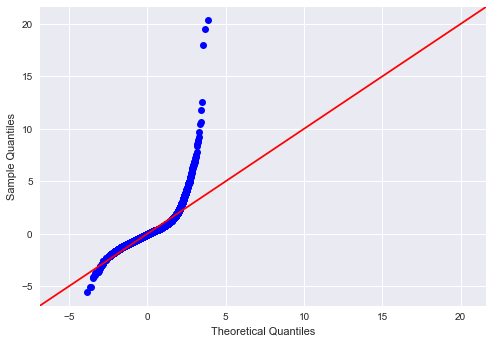

In [29]:
fig = sm.graphics.qqplot(model_regression.resid, dist=stats.norm, line='45', fit=True)

In [37]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_regression.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model_regression.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_regression.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_regression.predict(X_test))))
print('Cross Validation Train Set:', cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean())
print('Cross Validation Test Set:', cross_val_score(model, X_test, y_test, cv = 10, scoring = "r2").mean())

MSE for train set: 223079.52309059346
MSE for test set: 236611.33436665515
MSE difference: -13531.811276061693
Cross Validation Train Set: 0.6523987322183349
Cross Validation Test Set: 0.6453583351983113


-R^2 went up the
-high p value for 